## Understanding and Exploring King county Housing Market

In [199]:
#importing neccessary libraries
import numpy as np
                    
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt      #for plotting                    

from sklearn.linear_model import LinearRegression   #importing linear regression model

from pandas.plotting import scatter_matrix          #importing scatter plot

from sklearn.tree import DecisionTreeRegressor      #importing regression tree

from sklearn.preprocessing import LabelBinarizer    #importing label binarizer for creating dummy variables

import warnings                                     #import warnings

warnings.filterwarnings("ignore")                   #filtering warnings

from sklearn.model_selection import cross_val_score  #importing cv score

import os                                            #importing os

os.chdir(r"C:\Users\Manoj\praxis term 1\Python\Functions")

import updated_EDA

import graphs

***using Dataset from kaggle which records housing sale prices in King County, USA between the time period May 2014 - May 2015.***

In [200]:
#reading data

data = pd.read_csv(r"C:\Users\Manoj\praxis term 1\IML\kc_house_train_data.csv")


In [201]:
data.head()     #getting the first 5 rows of the data

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875  20141209T000000   604000.0         4       3.00         1960   
1  7237550310  20140512T000000  1230000.0         4       4.50         5420   
2  9212900260  20140527T000000   468000.0         2       1.00         1160   
3   114101516  20140528T000000   310000.0         3       1.00         1430   
4  6054650070  20141007T000000   400000.0         3       1.75         1370   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5000     1.0           0     0  ...      7        1050            910   
1    101930     1.0           0     0  ...     11        3890           1530   
2      6000     1.0           0     0  ...      7         860            300   
3     19901     1.5           0     0  ...      7        1430              0   
4      9680     1.0           0     0  ...      7        1370              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1965             0    98136  47.5208 -122.393           1360   
1      2001             0    98053  47.6561 -122.005           4760   
2      1942             0    98115  47.6900 -122.292           1330   
3      1927             0    98028  47.7558 -122.229           1780   
4      1977             0    98074  47.6127 -122.045           1370   

   sqft_lot15  
0        5000  
1      101930  
2        6000  
3       12697  
4       10208  

[5 rows x 21 columns]

**Reading the Data and Understanding of variables -**

1. **ID** - *Identification Number*
2. **Date** - *Date sold*
3. **price** -	*Sale price*
4. **bedrooms** - *number of bedrooms*
5. **bathrooms** - *Number of Bathrooms.*
   **0.25** - *Only Toilet*,
   **0.50** - *Toilet and Sink*,
   **0.75** - *Toilet, Sink and Shower*,
   **1** - *Toilet, Sink, Shower and Bathtub*
6.  **sqft_liv** - *Total living/built up area in square feet.*
7.  **sqft_lot** - *Total lot area(includes living area and other structures such as garages, swimming pools, and sheds) in                         square feet.*
8.  **floors** - *Number of floors.*
9.  **waterfront** - *‘1’ if the property has a waterfront, ‘0’ if not.*
10. **view** - *how good the view of the property on a index of (0 - min - 4 - max)*
11. **condition** - *Condition of the house, ranked from 1 to 5(1 min , 5 - max)*
12. **grade** - *classification of house based on the quality of construction and materials used measured on a index of(1 -13).*
13. **sqft_above** - *area above the basemeant in square feet.*     
14. **sqft_basmt** - *area below the basemeant in square feet.*
15. **yr_built** - *year built*
16. **yr_renov** - *year renovated (if never renovated it's zero)*
17. **zipcode** - *Zipcode of the house*
18. **lat** - *Latitude of the house.*
19. **long** - *longitude of the house*
20. **squft_liv15** - *avearge of the living area of nearest 15 houses in square feet.*
21. **squft_lot15** - *avearge of the lot area of nearest 15 houses in square feet.*

#### Problem Statement  - 

I want to understand what factors influence the Price of The house in King County, USA

#### objective - 

To fit a model using set of predictors which would best predict the price of houses at different locations.

## EDA -

In [220]:
import EDA                                            #importing the stored user defined function for EDA

In [221]:
#created a user defined EDA function for automating EDA

descreptive_stats, total_correlation, total_null_values, columns_with_correlation  = EDA.EDA( data,  #data for which EDA
    Correlation_check=1,            #correlation check (1 - yes) for all numerci columns                      to be done
    null_values=1,                  #checking null values(1 - yes) for all columns in dataset    
    columns_with_correlation=1,     #checking correlation for variables having +ve or -ve co-rrelation based on input threshold
    correlation_threshold=0.5)      #setting up the threshold for correlation coeffecient,if not given default threshold = +-0.5

In [222]:
descreptive_stats  #Descreptive statistics of all numeric columns in the dataset

id         price     bedrooms    bathrooms   sqft_living  \
count  9.761000e+03  9.761000e+03  9761.000000  9761.000000   9761.000000   
mean   4.605288e+09  5.428336e+05     3.375884     2.117175   2086.734146   
std    2.876044e+09  3.797779e+05     0.960697     0.773971    927.194303   
min    1.200019e+06  8.000000e+04     0.000000     0.000000    290.000000   
25%    2.126049e+09  3.200000e+05     3.000000     1.750000   1420.000000   
50%    3.905041e+09  4.500000e+05     3.000000     2.250000   1910.000000   
75%    7.338403e+09  6.490000e+05     4.000000     2.500000   2570.000000   
max    9.900000e+09  7.700000e+06    33.000000     8.000000  12050.000000   

           sqft_lot       floors   waterfront         view    condition  \
count  9.761000e+03  9761.000000  9761.000000  9761.000000  9761.000000   
mean   1.521526e+04     1.486067     0.008401     0.248028     3.415531   
std    4.126673e+04     0.532317     0.091275     0.787877     0.650552   
min    5.200000e+02     1.000000     0.000000     0.000000     1.000000   
25%    5.100000e+03     1.000000     0.000000     0.000000     3.000000   
50%    7.642000e+03     1.500000     0.000000     0.000000     3.000000   
75%    1.066000e+04     2.000000     0.000000     0.000000     4.000000   
max    1.651359e+06     3.500000     1.000000     4.000000     5.000000   

            grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
count  9761.00000  9761.000000    9761.000000  9761.000000   9761.000000   
mean      7.66151  1793.291159     293.442987  1970.799508     86.066592   
std       1.18268   835.763817     442.612722    29.240009    405.417369   
min       1.00000   290.000000       0.000000  1900.000000      0.000000   
25%       7.00000  1190.000000       0.000000  1951.000000      0.000000   
50%       7.00000  1570.000000       0.000000  1975.000000      0.000000   
75%       8.00000  2230.000000     570.000000  1996.000000      0.000000   
max      13.00000  8860.000000    3480.000000  2015.000000   2015.000000   

            zipcode          lat         long  sqft_living15     sqft_lot15  
count   9761.000000  9761.000000  9761.000000    9761.000000    9761.000000  
mean   98077.790185    47.560052  -122.214322    1992.359697   12824.785165  
std       53.203594     0.140236     0.139895     687.322247   26518.337402  
min    98001.000000    47.155900  -122.514000     620.000000     660.000000  
25%    98033.000000    47.467800  -122.327000    1490.000000    5160.000000  
50%    98065.000000    47.572200  -122.229000    1840.000000    7660.000000  
75%    98117.000000    47.680400  -122.126000    2370.000000   10113.000000  
max    98199.000000    47.777600  -121.319000    5790.000000  560617.000000

In [223]:
total_correlation            #correlation matrix of all the numeric columns in the data set

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.006011 -0.002571   0.005821    -0.007559 -0.130303   
price         -0.006011  1.000000  0.300777   0.527512     0.705044  0.094146   
bedrooms      -0.002571  0.300777  1.000000   0.506070     0.560989  0.028895   
bathrooms      0.005821  0.527512  0.506070   1.000000     0.758930  0.079435   
sqft_living   -0.007559  0.705044  0.560989   0.758930     1.000000  0.162786   
sqft_lot      -0.130303  0.094146  0.028895   0.079435     0.162786  1.000000   
floors         0.007793  0.262955  0.181042   0.501899     0.366219 -0.003543   
waterfront     0.000834  0.274953 -0.006803   0.061483     0.097203  0.029420   
view           0.023355  0.399711  0.079863   0.182988     0.285735  0.099221   
condition     -0.015321  0.044754  0.036135  -0.115382    -0.047938 -0.008722   
grade          0.012491  0.665594  0.342305   0.660925     0.764819  0.115611   
sqft_above    -0.006447  0.611450  0.462514   0.692911     0.878989  0.180913   
sqft_basement -0.003660  0.322369  0.301829   0.281433     0.435069 -0.000601   
yr_built       0.027053  0.051737  0.155102   0.499589     0.322723  0.054043   
yr_renovated  -0.024900  0.120439  0.018625   0.044756     0.043627  0.001219   
zipcode       -0.012130 -0.055619 -0.148339  -0.201454    -0.203761 -0.126091   
lat            0.009167  0.299191 -0.010547   0.018453     0.054830 -0.092245   
long           0.034395  0.023718  0.117168   0.217697     0.240170  0.224524   
sqft_living15 -0.001315  0.584829  0.376457   0.566076     0.758081  0.145285   
sqft_lot15    -0.137562  0.077960  0.018149   0.068722     0.163545  0.719922   

                 floors  waterfront      view  condition     grade  \
id             0.007793    0.000834  0.023355  -0.015321  0.012491   
price          0.262955    0.274953  0.399711   0.044754  0.665594   
bedrooms       0.181042   -0.006803  0.079863   0.036135  0.342305   
bathrooms      0.501899    0.061483  0.182988  -0.115382  0.660925   
sqft_living    0.366219    0.097203  0.285735  -0.047938  0.764819   
sqft_lot      -0.003543    0.029420  0.099221  -0.008722  0.115611   
floors         1.000000    0.022443  0.031938  -0.265390  0.461545   
waterfront     0.022443    1.000000  0.402725   0.024030  0.088039   
view           0.031938    0.402725  1.000000   0.059969  0.258123   
condition     -0.265390    0.024030  0.059969   1.000000 -0.133313   
grade          0.461545    0.088039  0.258123  -0.133313  1.000000   
sqft_above     0.534801    0.064297  0.170286  -0.153713  0.756226   
sqft_basement -0.242675    0.082214  0.277021   0.189828  0.174216   
yr_built       0.481926   -0.027010 -0.056361  -0.357396  0.447817   
yr_renovated   0.013655    0.101684  0.109750  -0.055525  0.013053   
zipcode       -0.064479    0.023656  0.075834   0.003410 -0.187340   
lat            0.044827   -0.009410  0.005503  -0.017622  0.107977   
long           0.134683   -0.039227 -0.074630  -0.106514  0.201114   
sqft_living15  0.289238    0.097196  0.292435  -0.080423  0.717835   
sqft_lot15    -0.013269    0.028499  0.079904   0.002253  0.118618   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.006447      -0.003660  0.027053     -0.024900 -0.012130   
price            0.611450       0.322369  0.051737      0.120439 -0.055619   
bedrooms         0.462514       0.301829  0.155102      0.018625 -0.148339   
bathrooms        0.692911       0.281433  0.499589      0.044756 -0.201454   
sqft_living      0.878989       0.435069  0.322723      0.043627 -0.203761   
sqft_lot         0.180913      -0.000601  0.054043      0.001219 -0.126091   
floors           0.534801      -0.242675  0.481926      0.013655 -0.064479   
waterfront       0.064297       0.082214 -0.027010      0.101684  0.023656   
view             0.170286       0.277021 -0.056361      0.109750  0.075834   
condition       -0.153713       0.189828 -0.357396     -0.055525  0.

In [225]:
columns_with_correlation  #checking for variables with correlation coeffecient value above +- 0.50

bathrooms  sqft_living     grade  sqft_above  sqft_living15  \
bathrooms       1.000000     0.758930  0.660925    0.692911       0.566076   
sqft_living     0.758930     1.000000  0.764819    0.878989       0.758081   
grade           0.660925     0.764819  1.000000    0.756226       0.717835   
sqft_above      0.692911     0.878989  0.756226    1.000000       0.726505   
sqft_living15   0.566076     0.758081  0.717835    0.726505       1.000000   
price           0.527512     0.705044  0.665594    0.611450       0.584829   
bedrooms        0.506070     0.560989  0.342305    0.462514       0.376457   
floors          0.501899     0.366219  0.461545    0.534801       0.289238   
sqft_lot15      0.068722     0.163545  0.118618    0.185507       0.185966   
long            0.217697     0.240170  0.201114    0.343715       0.327811   
zipcode        -0.201454    -0.203761 -0.187340   -0.264223      -0.279658   

                  price  bedrooms    floors  sqft_lot15      long   zipcode  
bathrooms      0.527512  0.506070  0.501899    0.068722  0.217697 -0.201454  
sqft_living    0.705044  0.560989  0.366219    0.163545  0.240170 -0.203761  
grade          0.665594  0.342305  0.461545    0.118618  0.201114 -0.187340  
sqft_above     0.611450  0.462514  0.534801    0.185507  0.343715 -0.264223  
sqft_living15  0.584829  0.376457  0.289238    0.185966  0.327811 -0.279658  
price          1.000000  0.300777  0.262955    0.077960  0.023718 -0.055619  
bedrooms       0.300777  1.000000  0.181042    0.018149  0.117168 -0.148339  
floors         0.262955  0.181042  1.000000   -0.013269  0.134683 -0.064479  
sqft_lot15     0.077960  0.018149 -0.013269    1.000000  0.248391 -0.142375  
long           0.023718  0.117168  0.134683    0.248391  1.000000 -0.560433  
zipcode       -0.055619 -0.148339 -0.064479   -0.142375 -0.560433  1.000000

In [224]:
total_null_values   #checking for null values in the data set

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#checking for Data types

data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

###### Doing further analysis using graphs

###### Univariate analysis - 

### Bar Plots and Histogram -

In [213]:
def graphs(data,columns=None,directory=os.getcwd()+'\\'):   #function which would plot box plot and histograms for all the quantitative data
    if columns==None:                                       #if user doesn't provide column names then obtaining same from data frame
        columns = list(data.columns)
    df = data[columns]                                      #defining data frame which is to be used for making graphs
    numeric = df.select_dtypes(include='number')            #making seperate dataframe for the numeric columns
    string = df.select_dtypes(['object'])                   #making seperate dataframe for the string columns
    for i in range(numeric.shape[1]):                       #running a for loop by taking the number of columns as it's range
        fig = plt.figure(figsize=(8,8),tight_layout = 1)    #plotting a figure
        fig1 = fig.add_subplot(2,1,1)                       #creating subplots to include boxplot and histogram in one image
        plt.boxplot(numeric.iloc[:,i],vert=0,notch = 1)       #creating the boxplot
        plt.xlabel(numeric.columns[i])                        #assigning X-axis label
        plt.title('Boxplot of %s'%numeric.columns[i])         #assigning box plot title
        fig2 = fig.add_subplot(2,1,2)                       #creating subplots to include boxplot and histogram in one image
        plt.hist(numeric.iloc[:,i],edgecolor = "black")       #creating the histogram
        plt.xlabel(numeric.columns[i])                        #assigning X-axis label
        plt.ylabel('Frequency')                             #assigning Y-axis label
        plt.title('Histogram of %s'%numeric.columns[i])       #assigning histogram title
        #fig.savefig(directory+numeric.columns[i]+".png")      #saving the figure in png format
        #plt.close(fig)                                      #closing the figure as i don't want to display it here   
    c = 0                                                   #counnter for while loop
    while c<np.size(string.columns):                        #iterating through all string columns of dataframe
        plt.figure(figsize=(8,8))                           #difining the figure size
        string.iloc[:,c].value_counts().plot(kind='bar', edgecolor='black', color='DarkOrange') #creating the bar chart
        plt.xticks(rotation = 0)                            #making X-axis labels horizontal
        plt.title("Bar Chart of "+string.columns[c])        #assigning histogram title
        plt.xlabel(string.columns[c])                       #assigning X-axis label
        plt.ylabel("Frequency")                             #assigning Y-axis label
        #plt.savefig(directory+string.columns[c]+".png")     #saving the bar chart at user specified directory as png file
        #plt.close()                                         #closing the figure as we don't want to display it here
        c+=1                                                #incrementing the loop counter

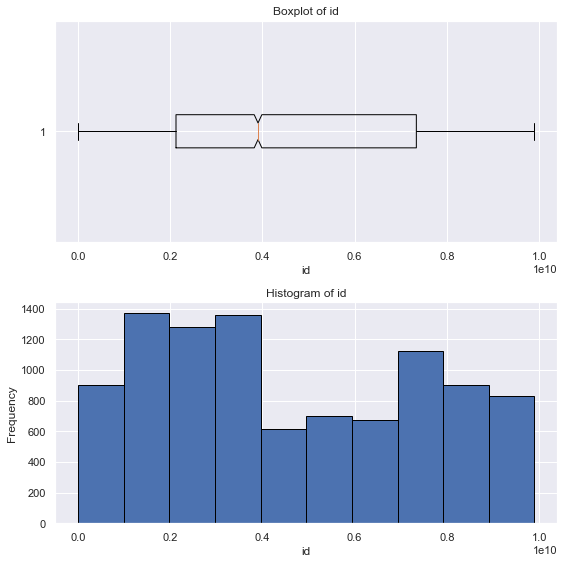

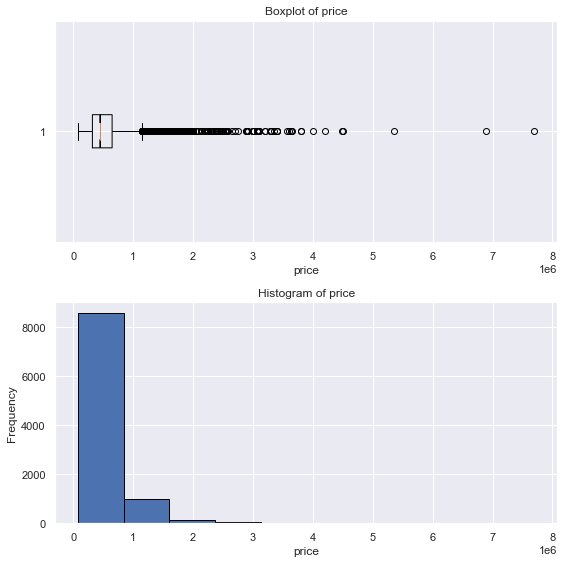

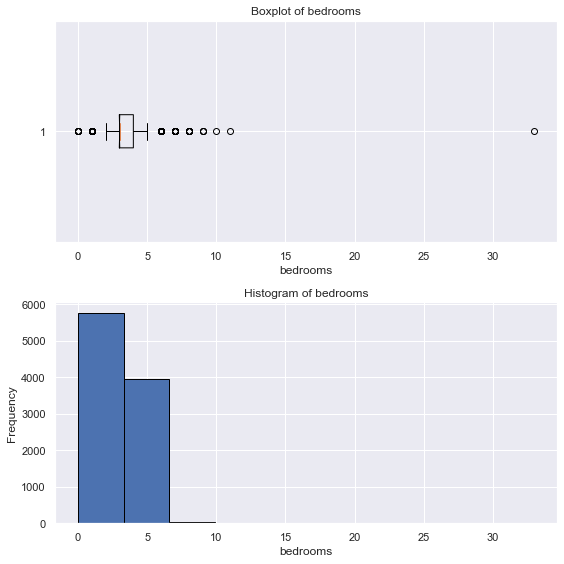

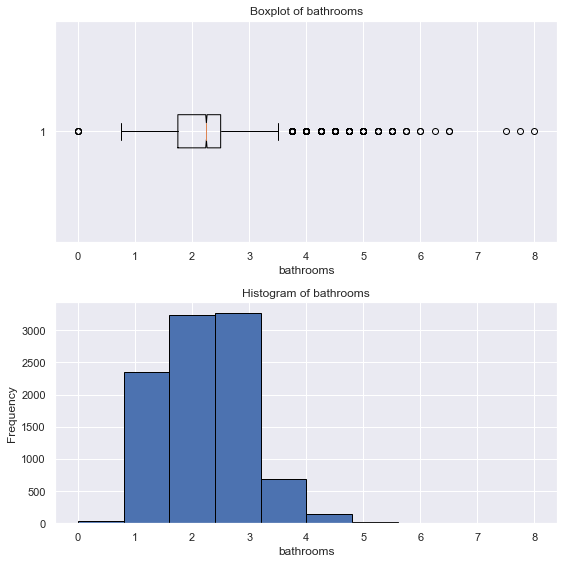

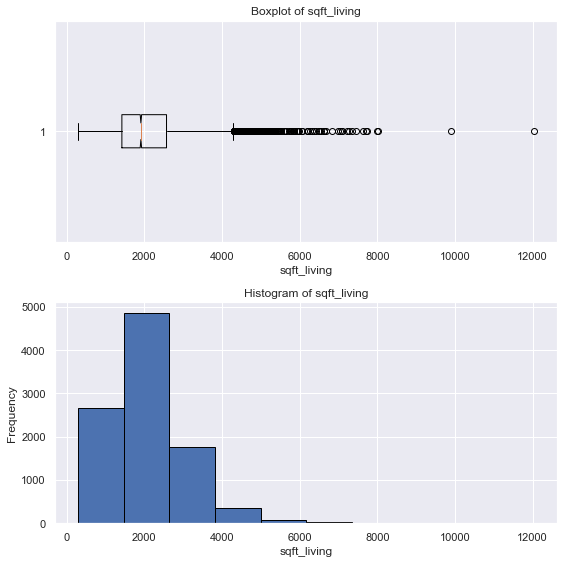

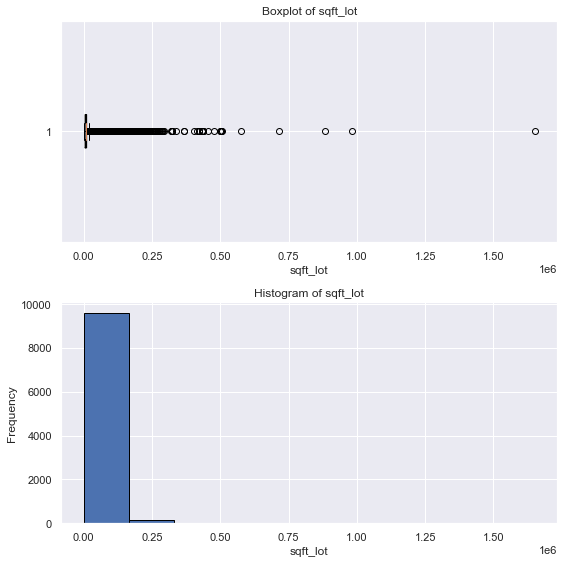

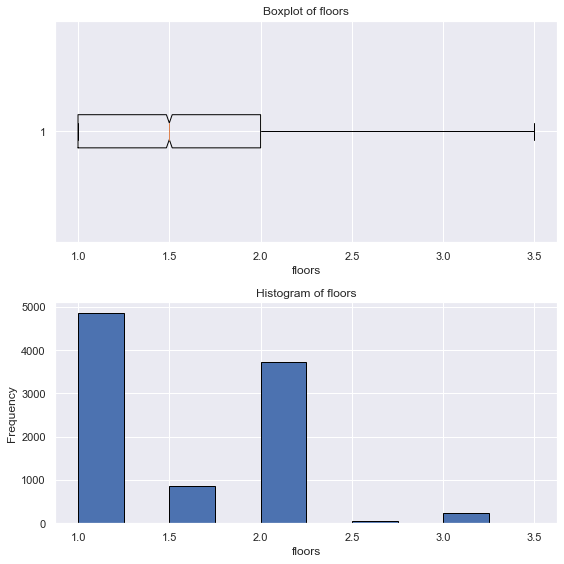

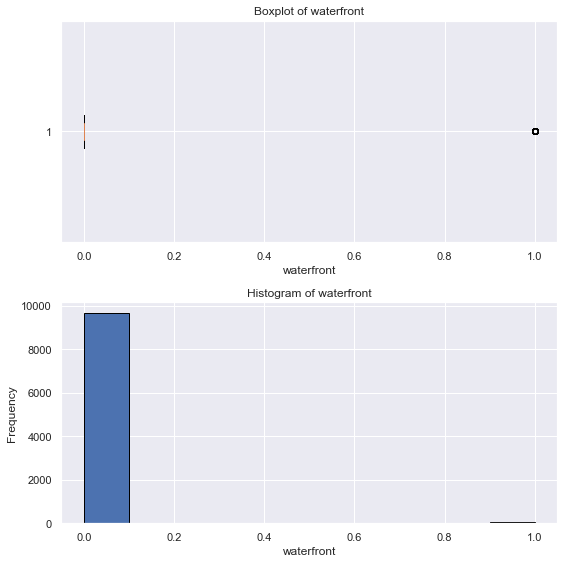

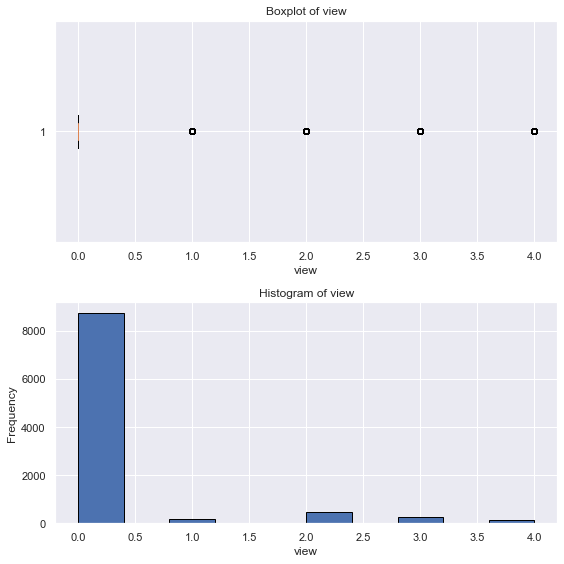

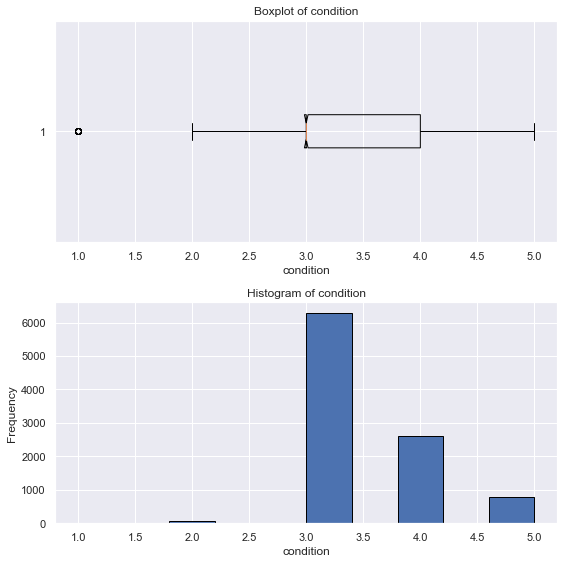

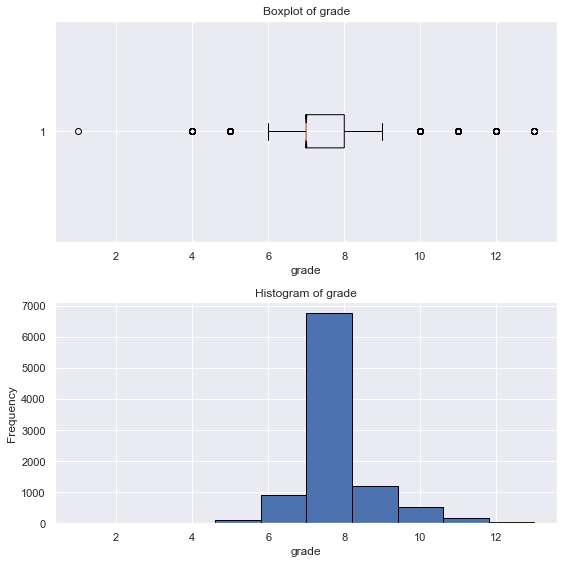

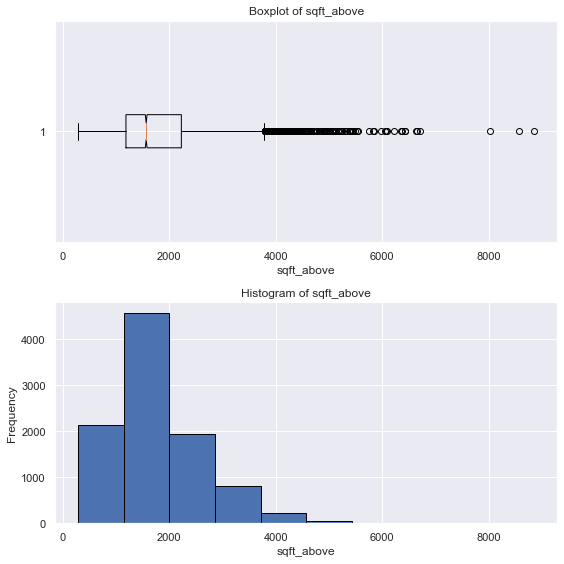

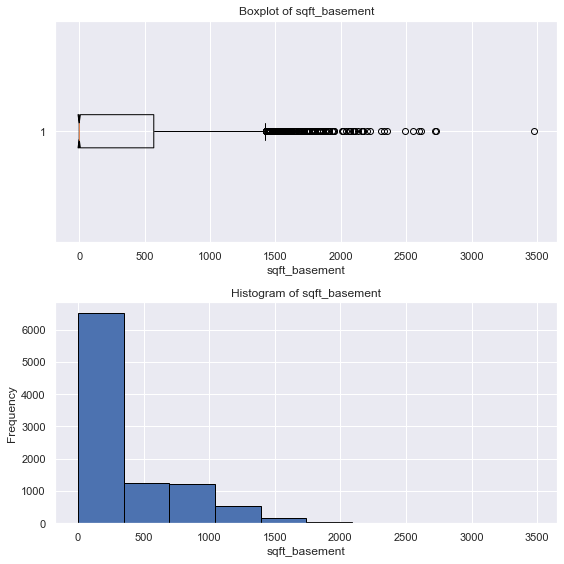

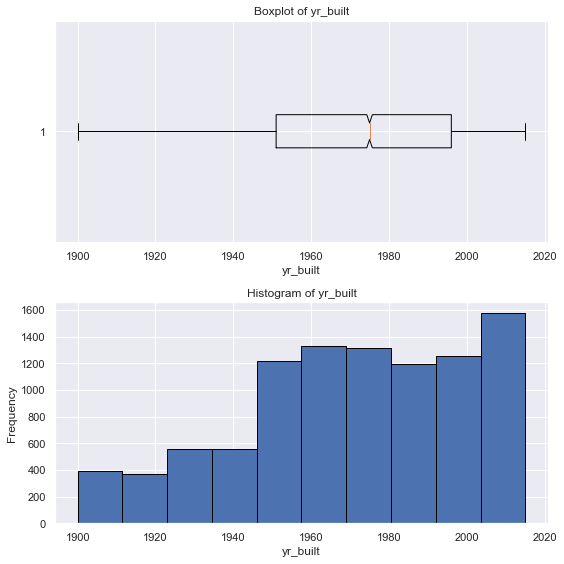

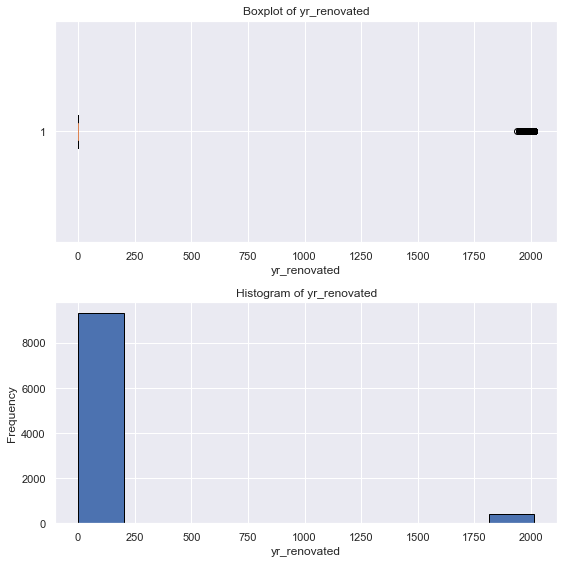

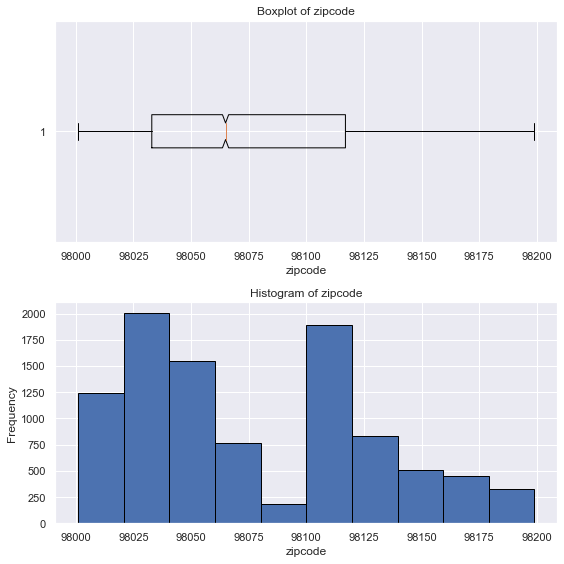

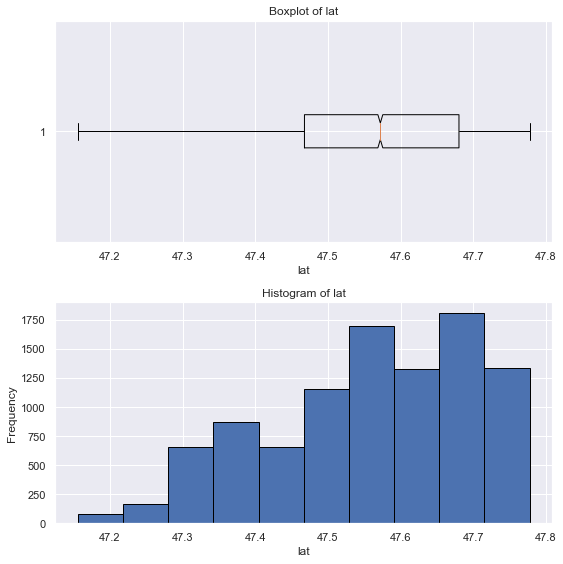

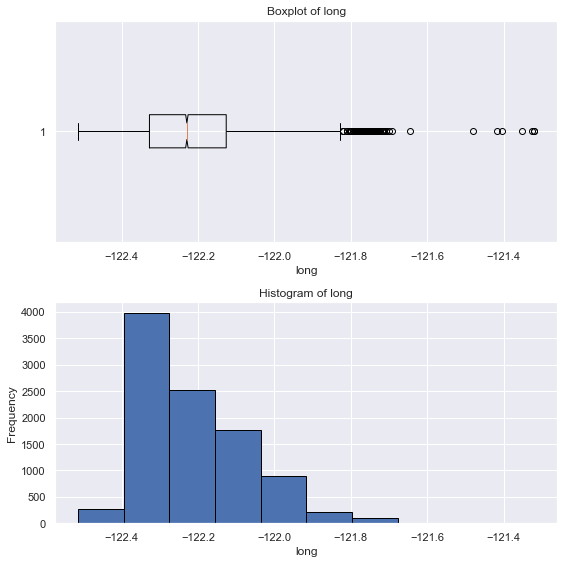

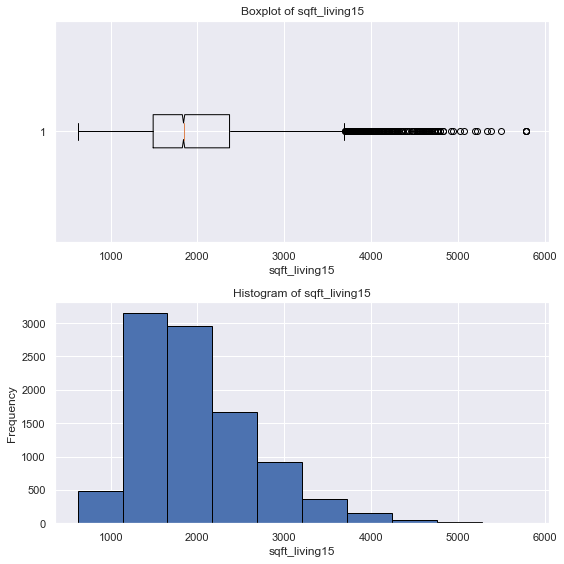

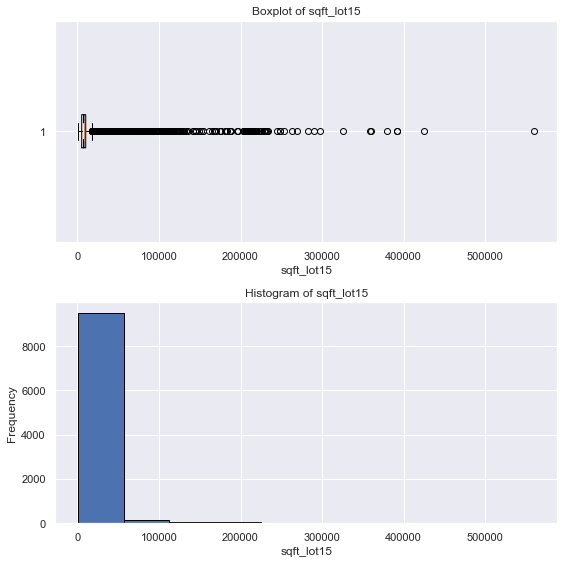

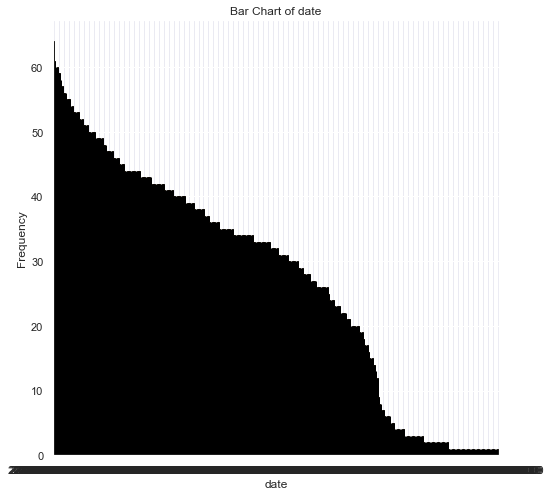

In [214]:
graphs(data)

### Scatterplots -

In [114]:
#this function will plot and box plots and histograms for quantitative data and barplots for categorical data

graphs.graphs(data)   

In [215]:
#created a function which would automaticaly plot scatter plots for all the variables with y-axis as price
#the graphs would get stored in the current directory if no directory has been specified


def graphs(data,columns=None,directory=os.getcwd()+'\\'):   #function which takes 3 input arguments 
    if columns==None:                                       #if no columns specified would plot for all the columns                                     
        columns = list(data.columns)                        #if columns not specified
    df = data[columns]                                      
    dataN = df.select_dtypes(include='number')              #seperates quantitative data                                
    for i in range(dataN.shape[1]):                         
        fig = plt.figure(figsize = (10,10))                 #setting up fig size
        fig = sns.scatterplot(x = dataN.iloc[:,i],y = dataN["price"])   #plotting a scatter plot
        #plt.scatter(x = dataN.iloc[:,i],y = dataN["price"])
        plt.ylabel("Price")                                         #plotting  x-label
        plt.xlabel(dataN.columns[i])                                #plotting  y-label
        plt.title('scattercplot of %s'%dataN.columns[i])            #plotting title     
        #plt.savefig(directory+dataN.columns[i]+".png")              #saving the figure
        #plt.close()                                                 #closing the figure

### Scatter Plots -

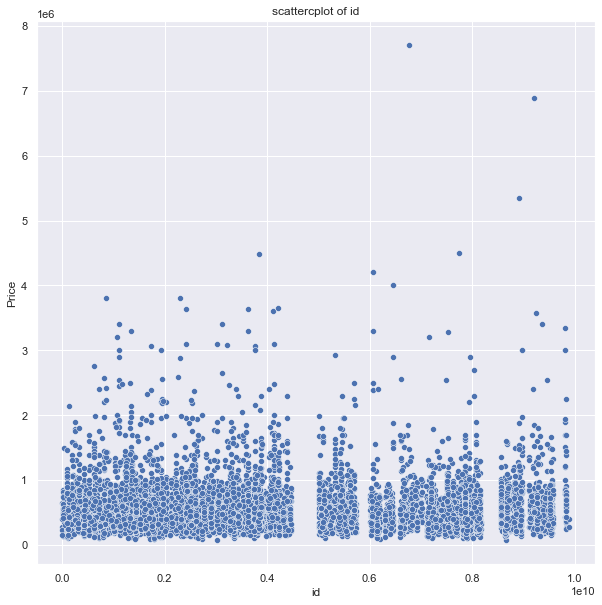

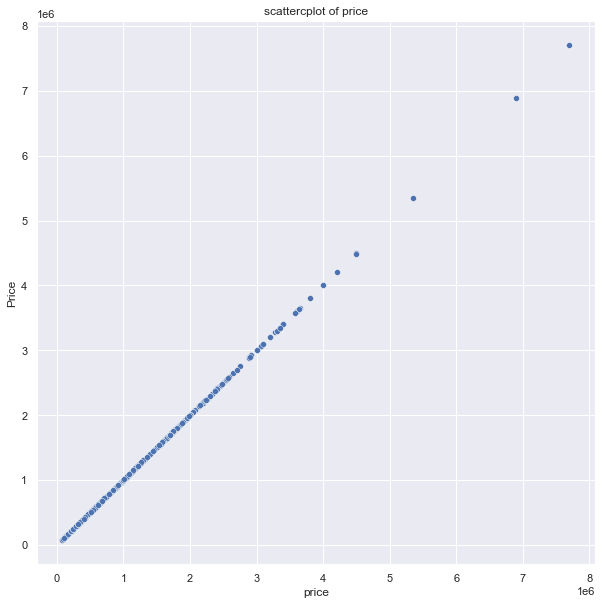

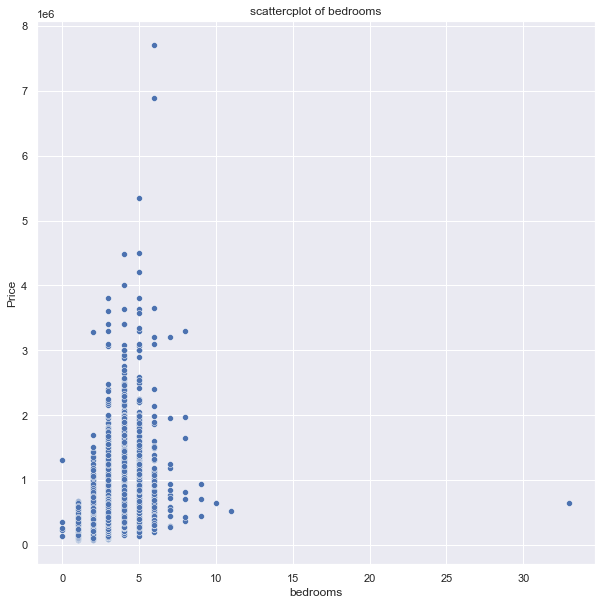

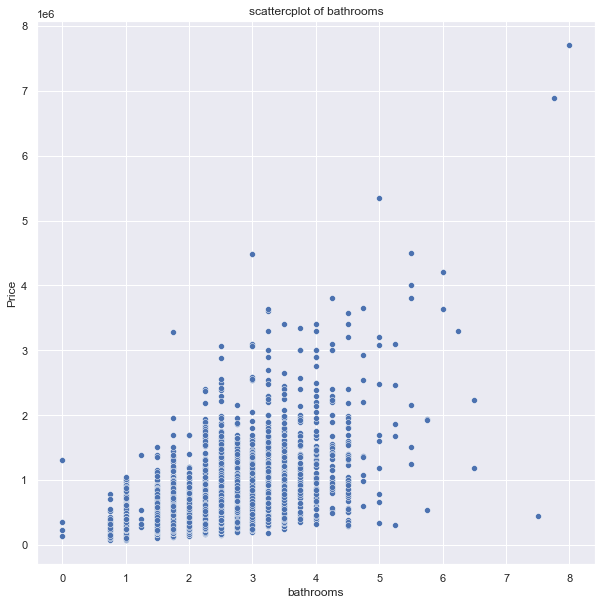

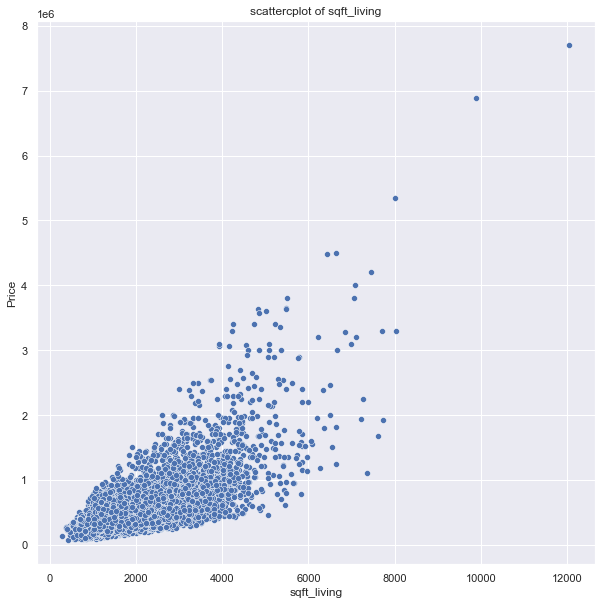

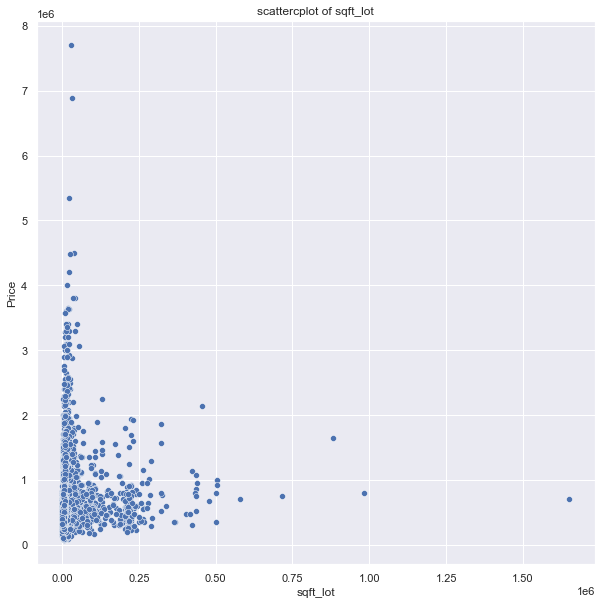

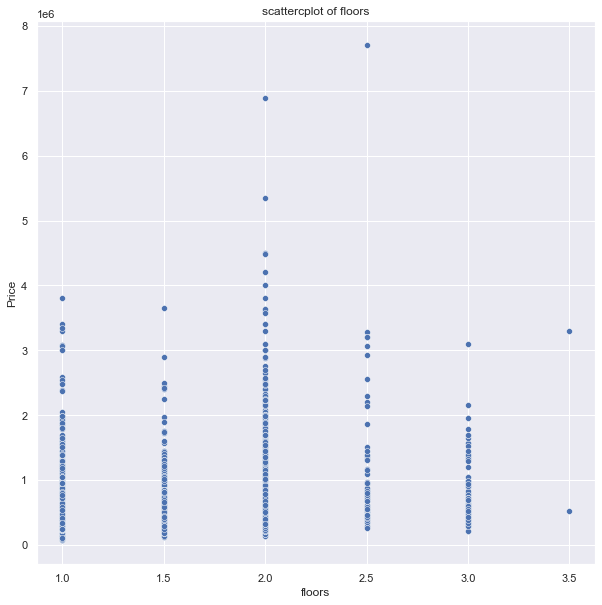

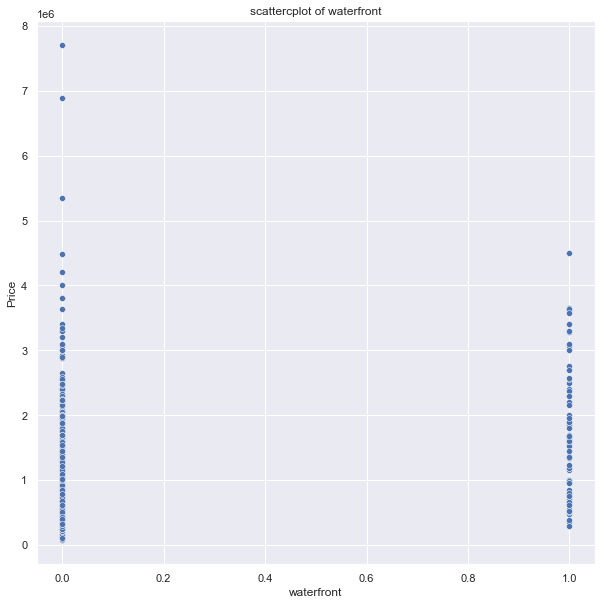

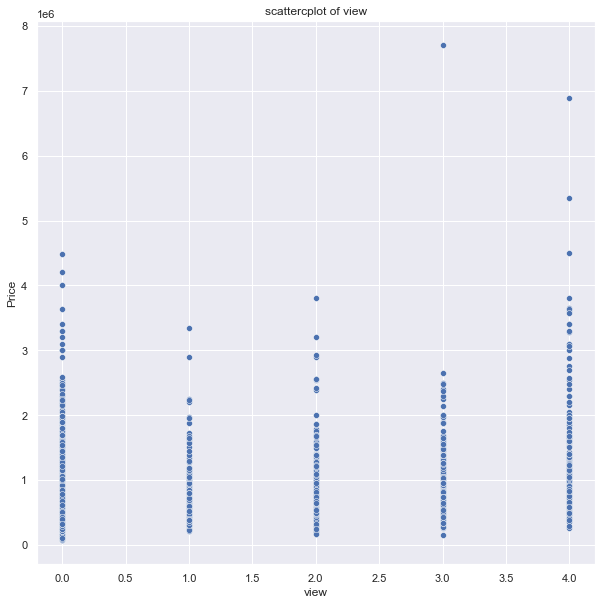

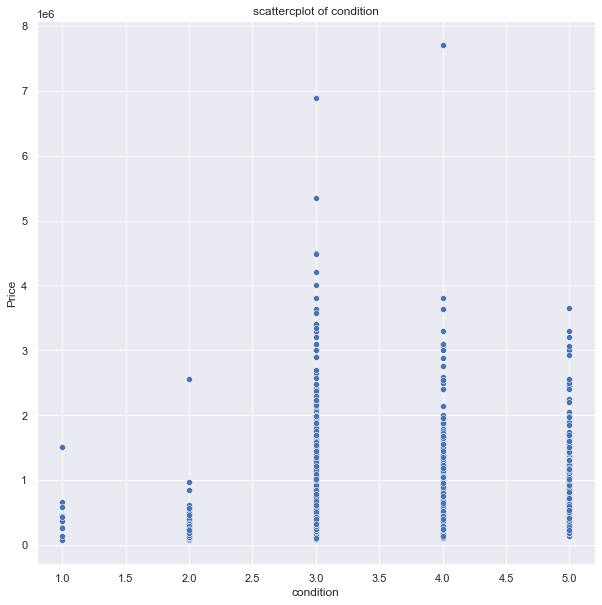

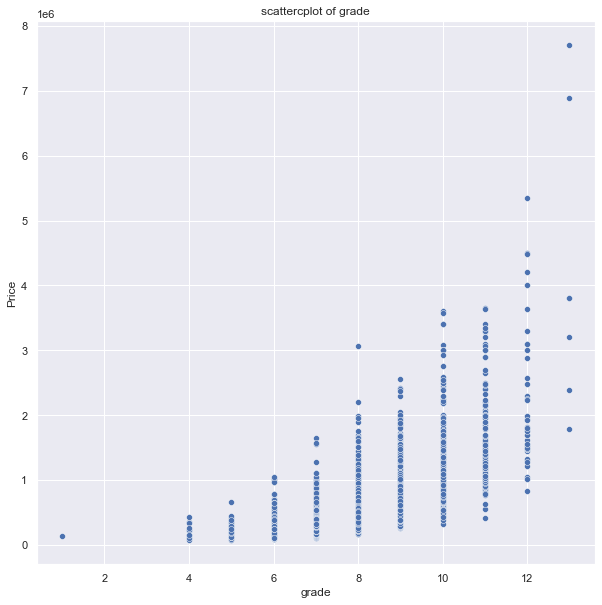

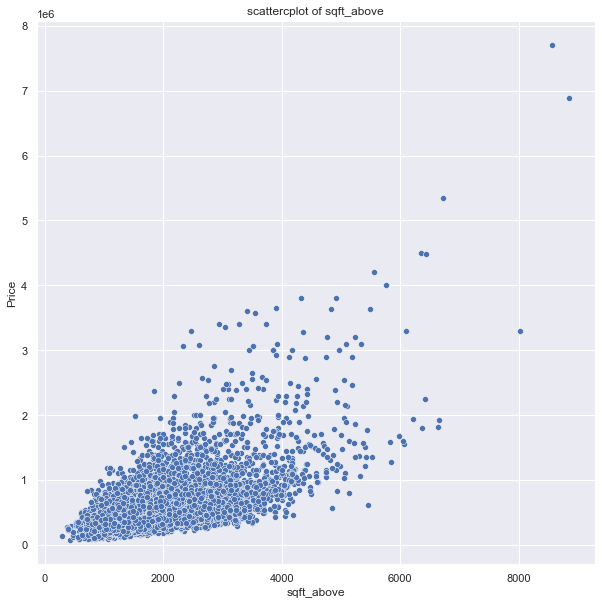

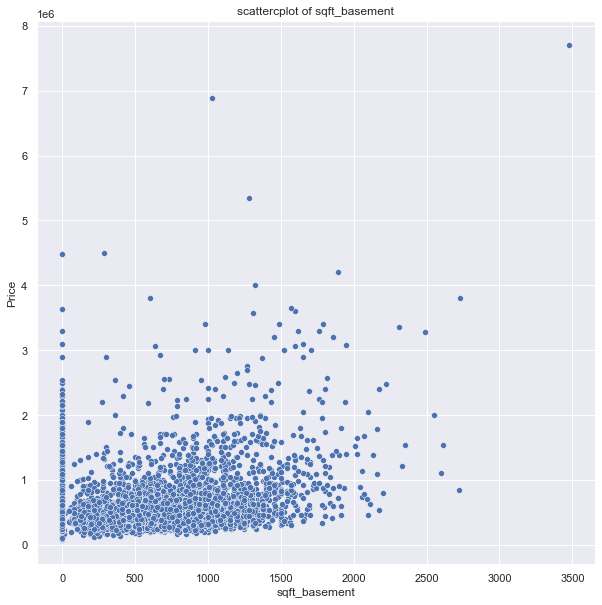

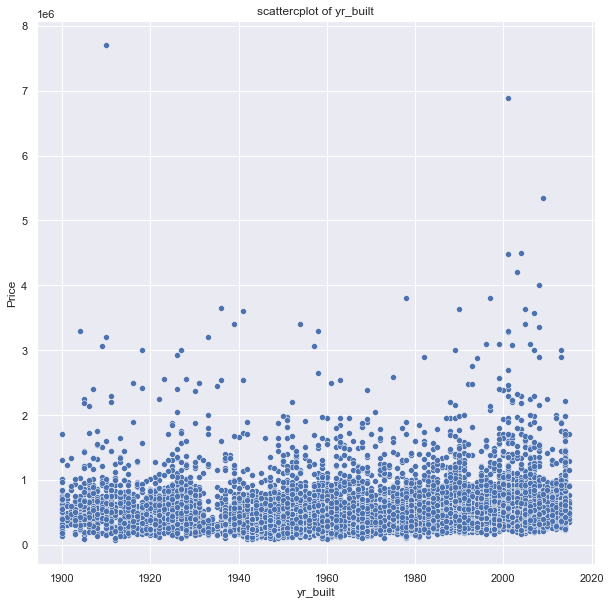

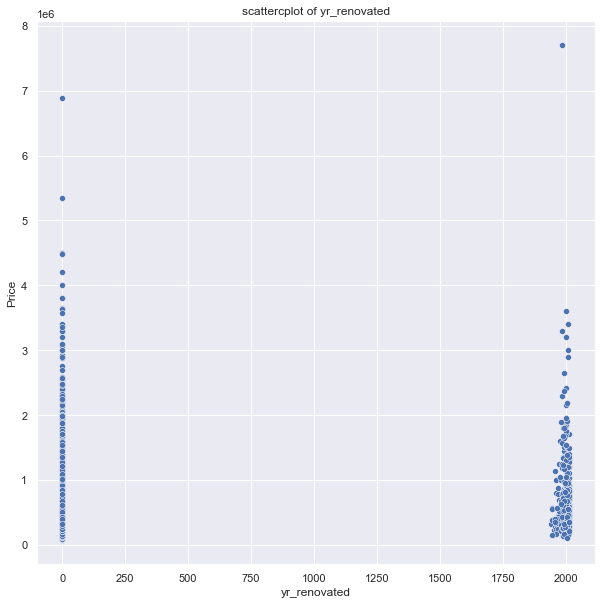

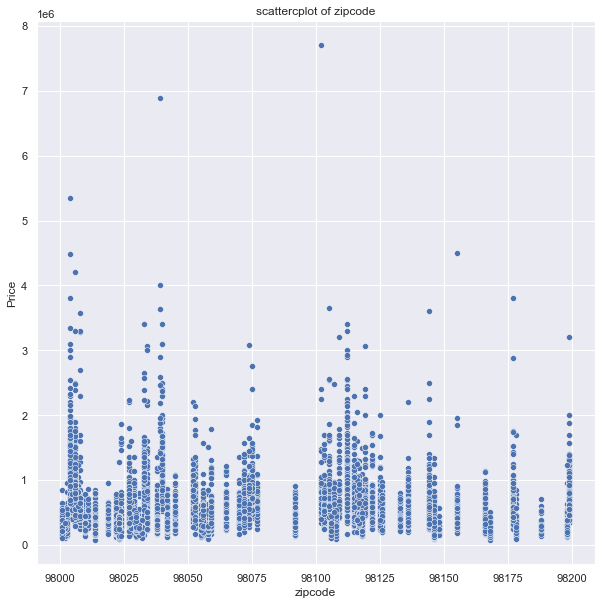

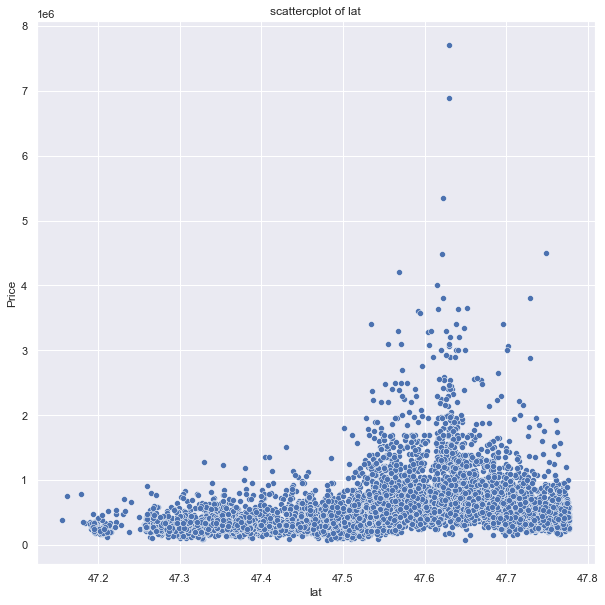

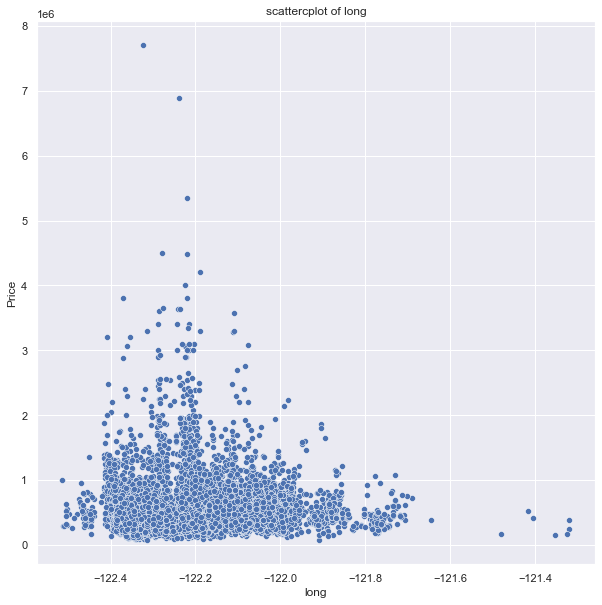

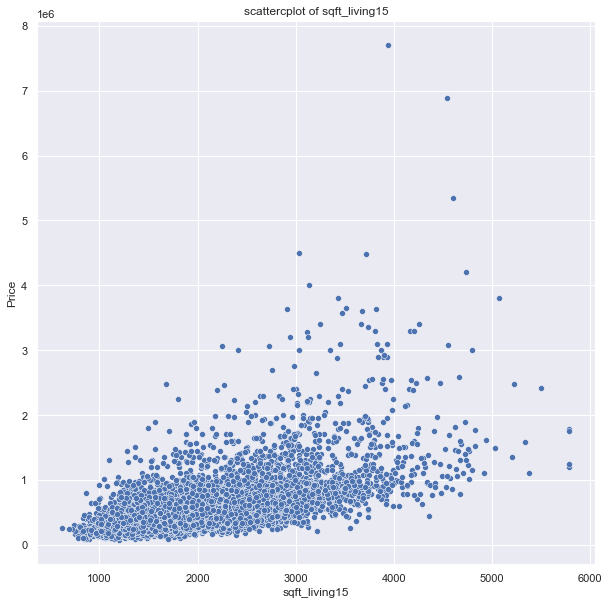

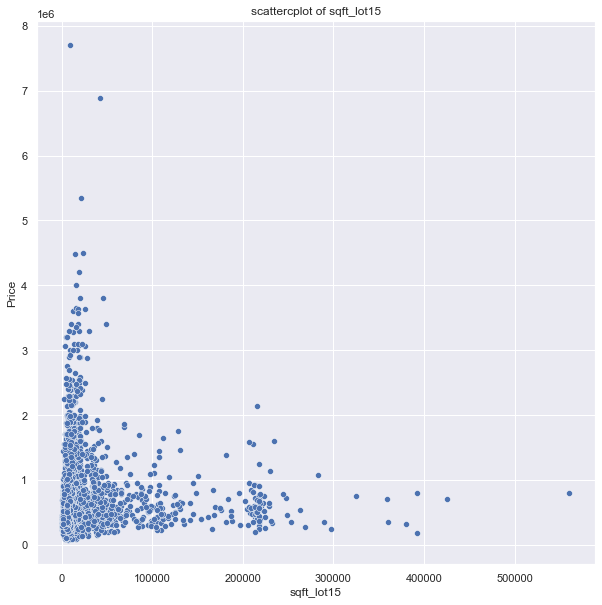

In [216]:
graphs(data)

**Observations**

1. Bathrooms and price roughly showed a positive co-rrelation.

2. bedrooms and price roughly showed a moderate positive correlation.

3. Condition and price showed a rough positive correlation.

4. Grade of the house and price showed a strong positive co-rrelation.

5. sqft_above and price showed a rough positive co-rrelation.

6. sqft_living and price showed a positive co-rrelation.


###### Bivariate analysis - 

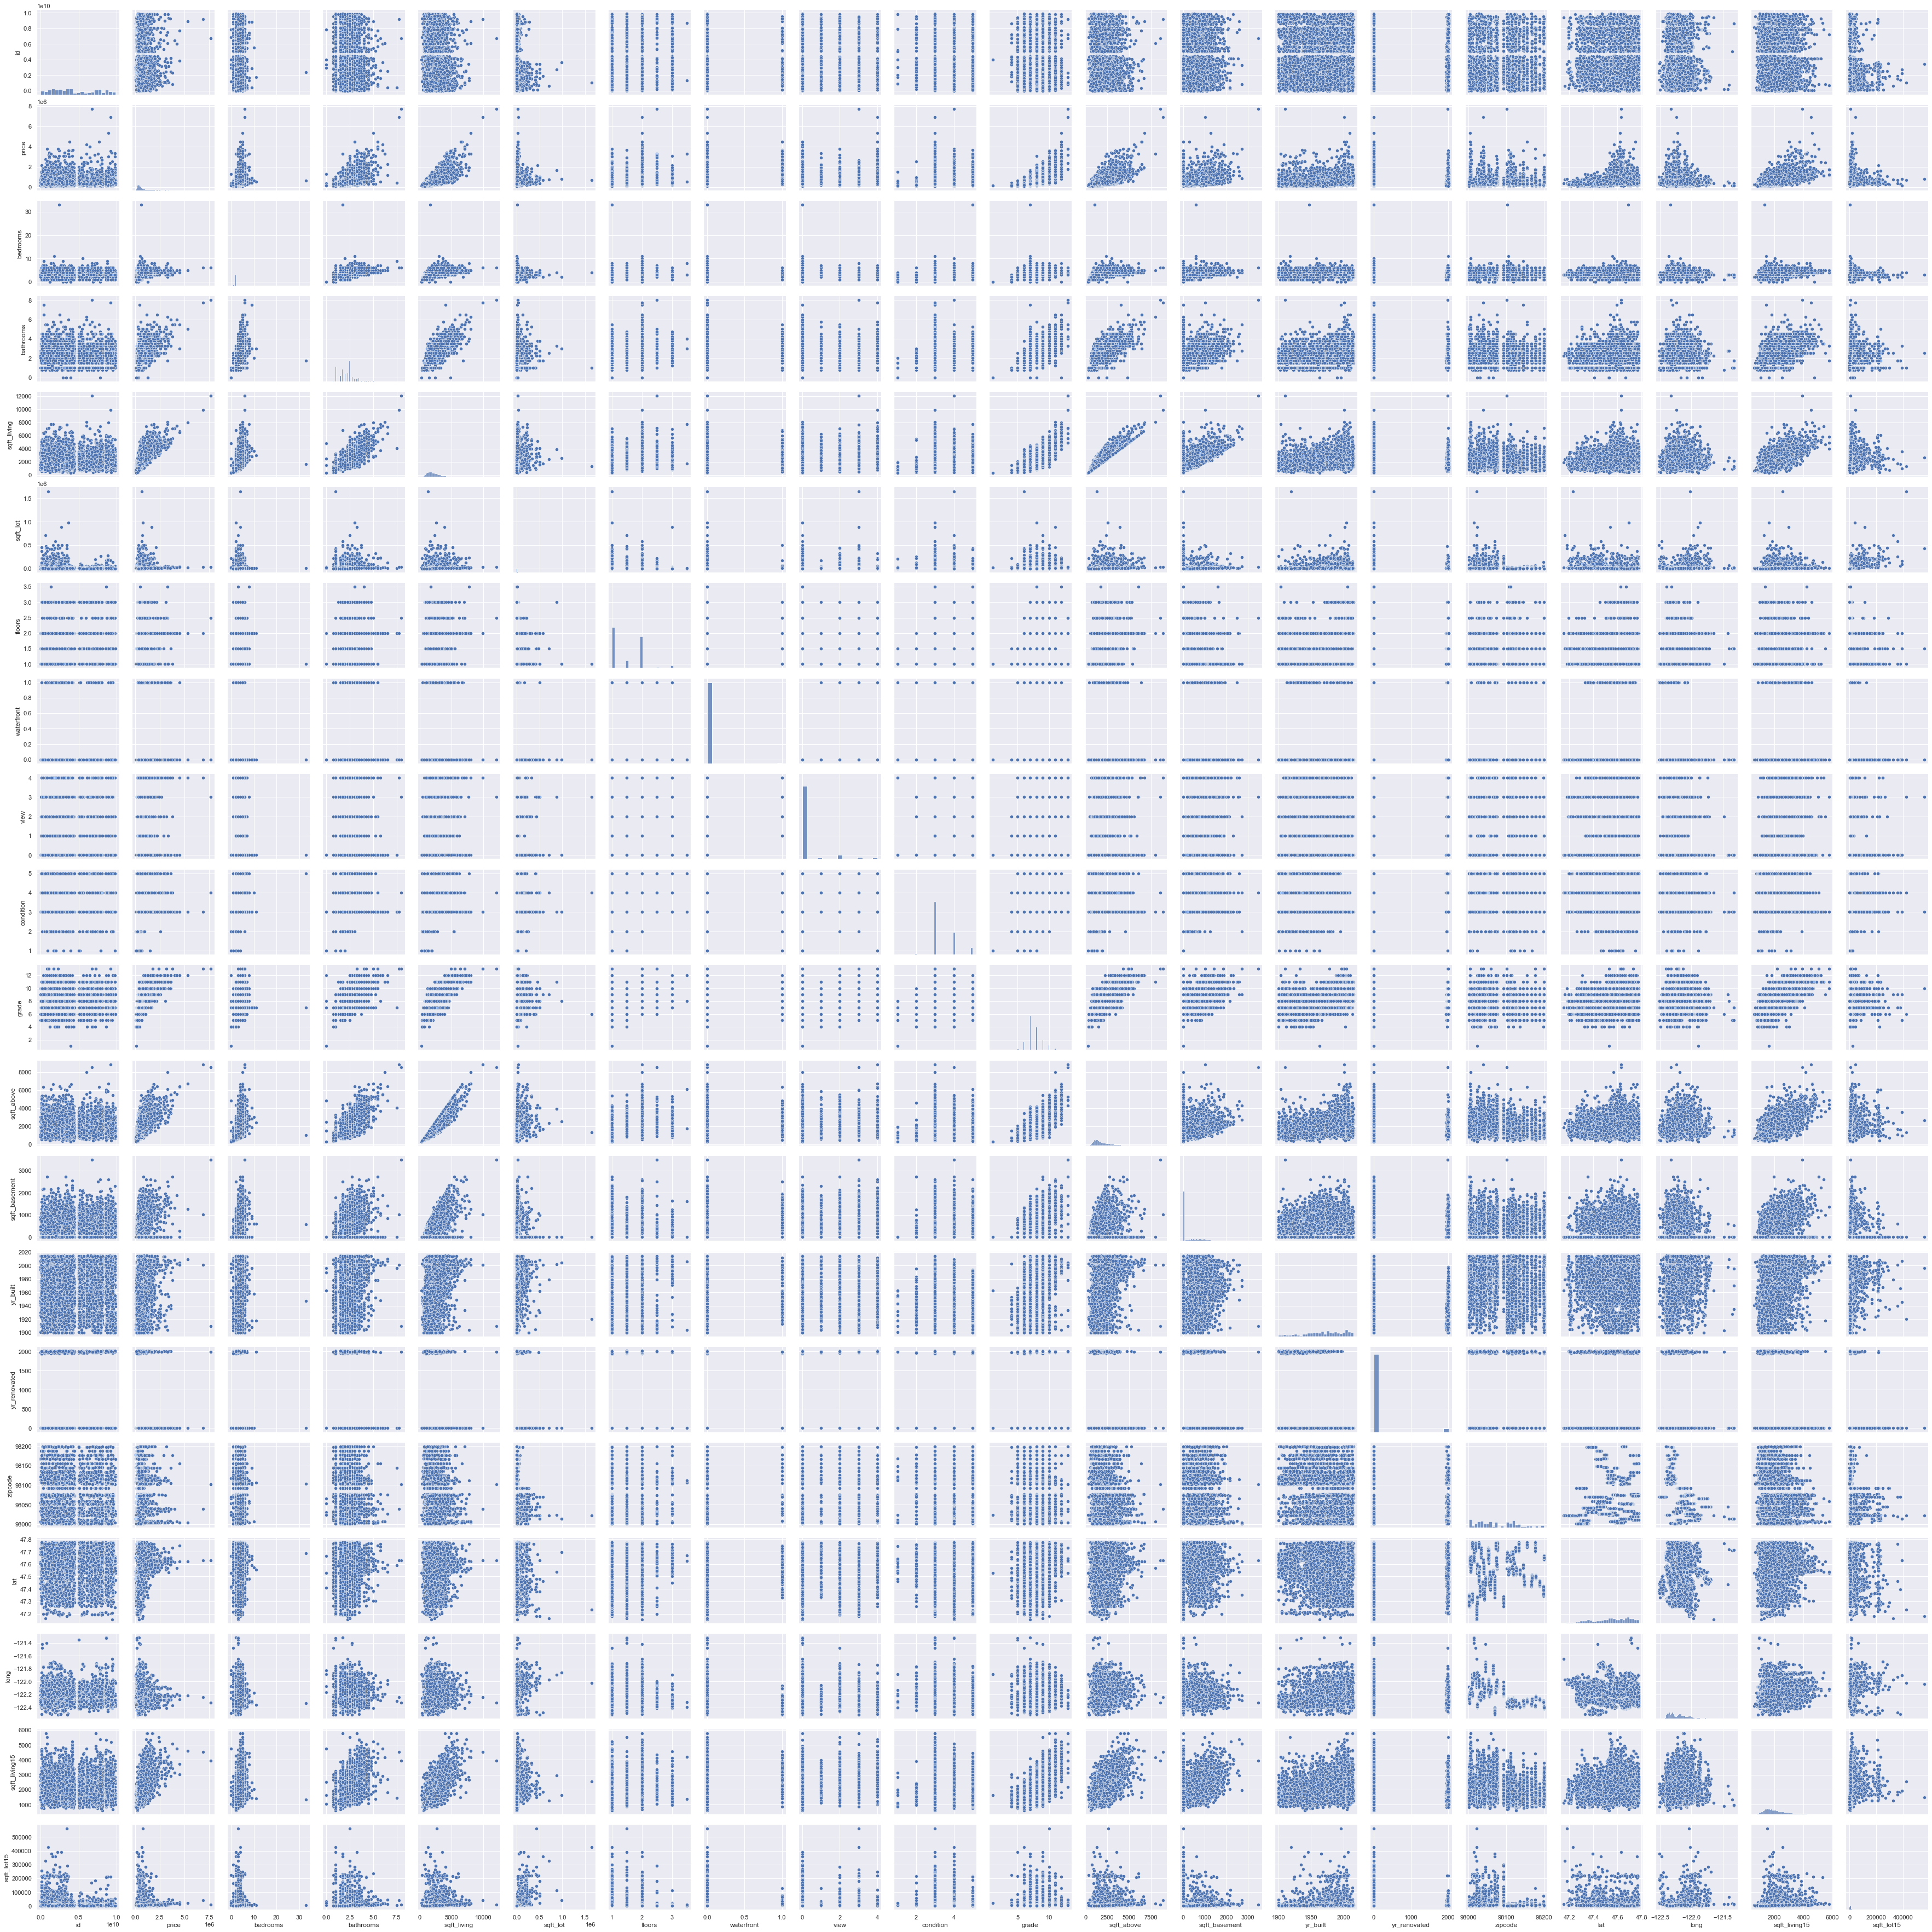

In [209]:
#bivariate analysis by plotting Pairwise Scatterplot for all variables

sns.set()
sns.pairplot(data, size = 2.5)
plt.show();

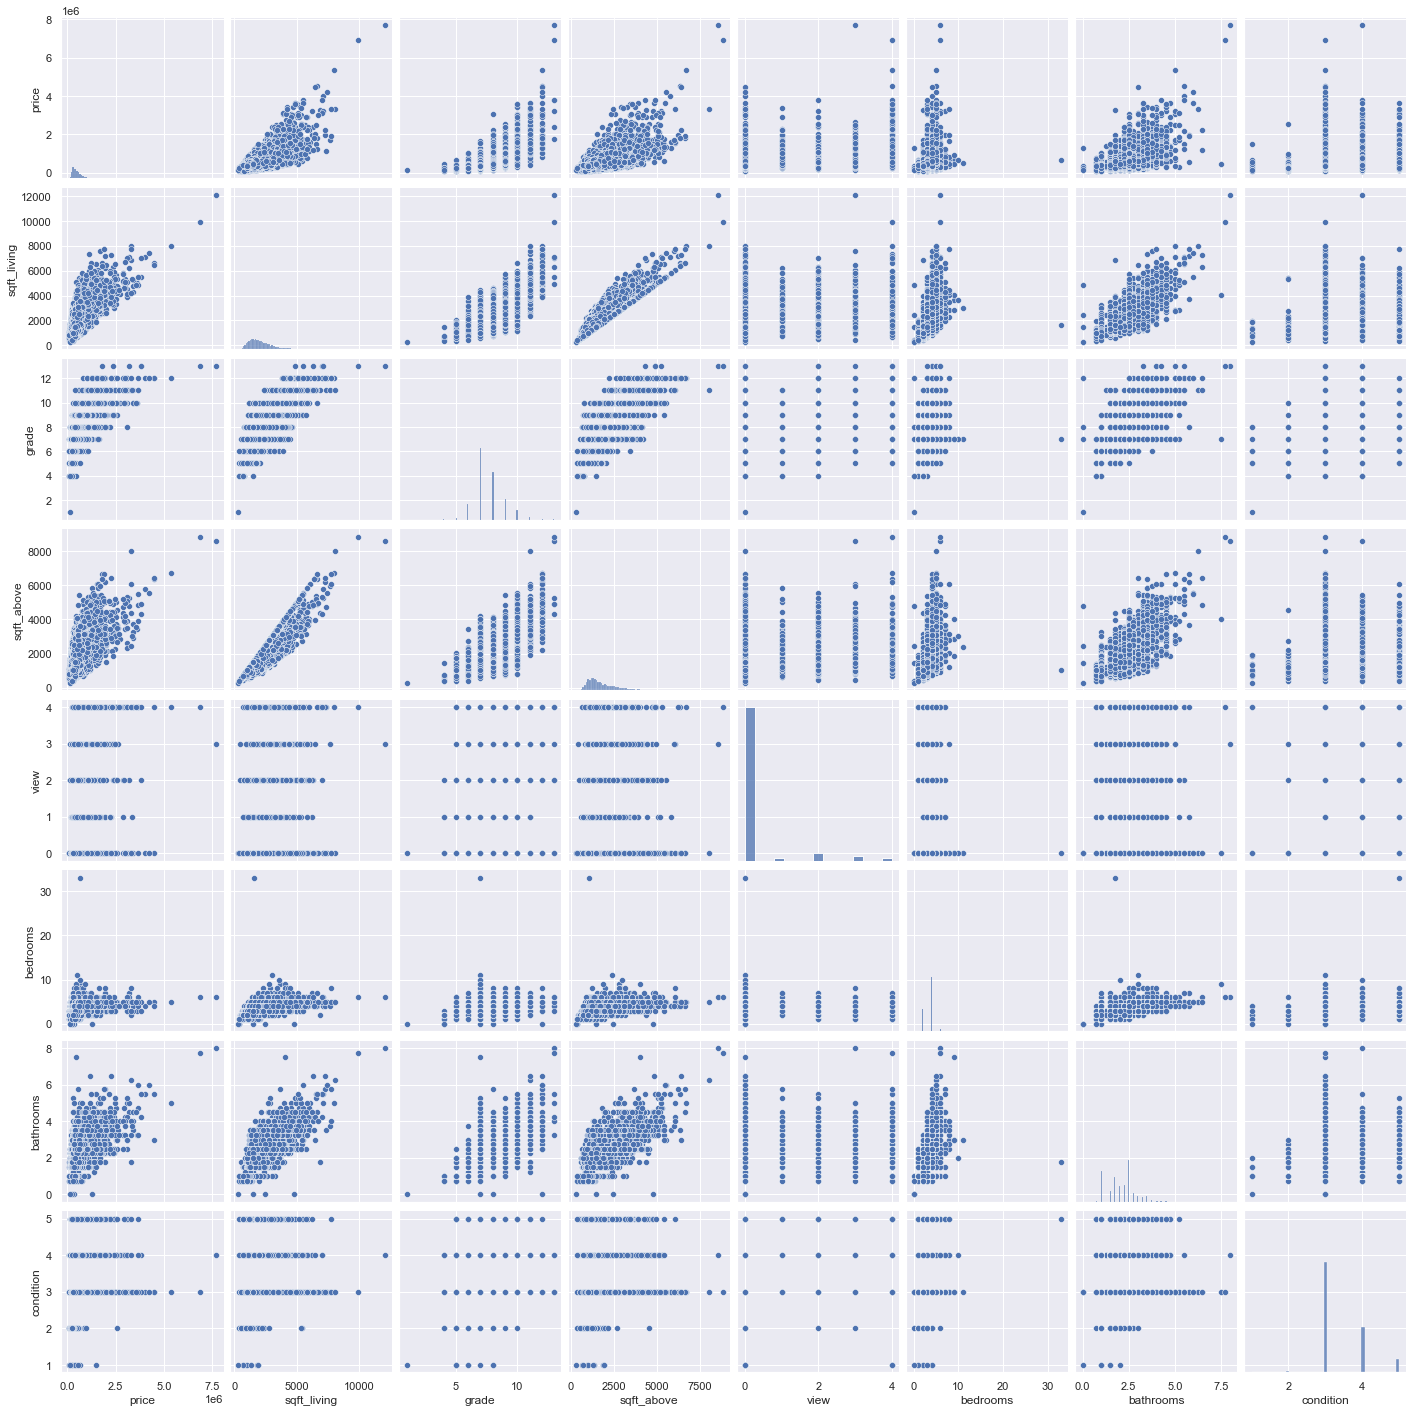

In [11]:
#let's look at pairwise scatterplots of the variables which have positive correlation with price
#scatterplot
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view',"bedrooms", 'bathrooms',"condition"]
sns.pairplot(data[cols], size = 2.5)
plt.show();

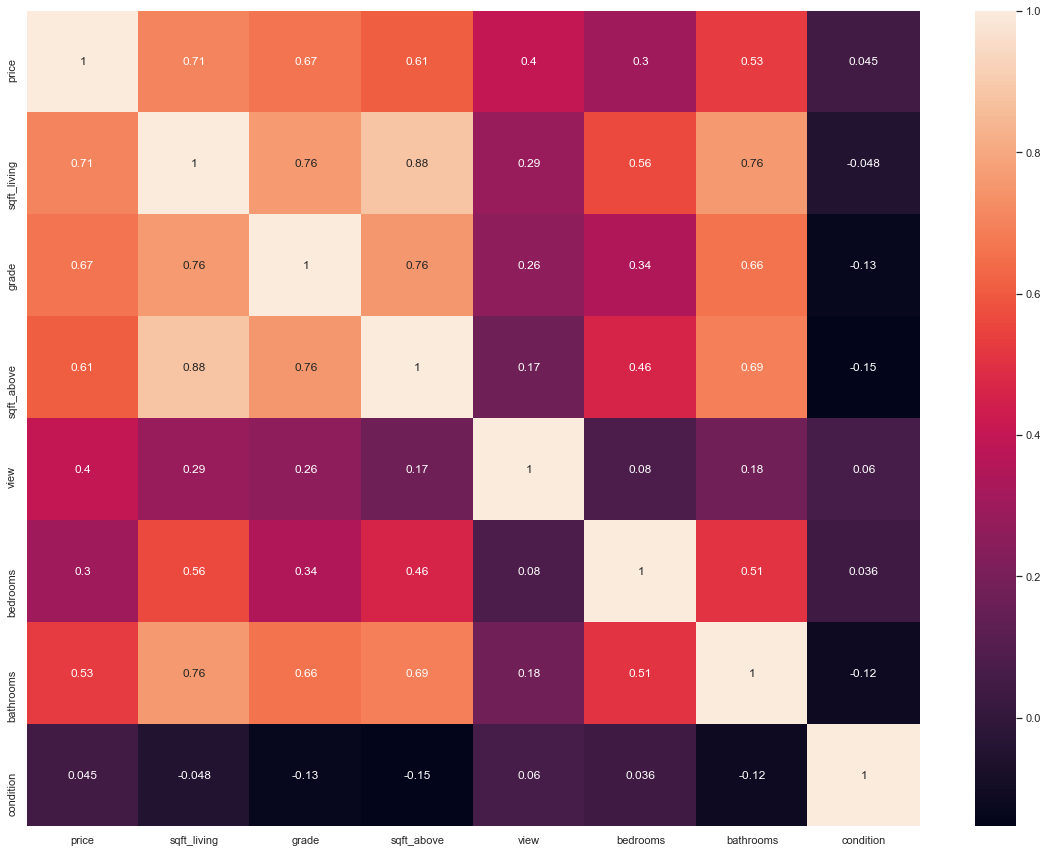

In [12]:
#bivariate analysis
#checking for strength of correlation using heat map for variables which have positive correlation with price
#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

cor = data[['price', 'sqft_living', 'grade', 'sqft_above', 'view',"bedrooms", 'bathrooms',"condition"]].corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True)
plt.show()

### surprising eliments -- 

* During initial analysis i assumed that lot size might be a prime factor in deciding the price of the house
  where as after eda got to realize there is no significant change in price of the house when the lot size increases.
  
  
* Number of Bathrooms and Bedrooms showed a positive correlation with price yet they were not significant factors in 
  deciding the price of a house.

 **-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------** 

# Model Fitting

**Model - 1**

In [13]:
#i have used all the quantitative values as predictors.

COLUMNS= ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above','sqft_basement', 'lat', 'long','sqft_living15', 'sqft_lot15']

X_train=data[COLUMNS]  #predictors
y_train=data.price     #target variables

In [14]:
#fitting the model

regr = LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

In [15]:
#co-effecients of the predictors

regr.coef_    

array([-4.74675790e+04,  2.12644384e+04,  1.74605096e+02,  3.75226272e-01,
       -1.74061939e+04,  1.01407506e+02,  7.31975897e+01,  6.44041848e+05,
       -4.15396968e+05,  8.07709894e+01, -4.24616953e-01])

In [16]:
#doing 10 fold cv with RMSE as performance metric 

scores= cross_val_score(regr,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')        # k = 10 folds
cv_score = np.mean(abs(scores))                                                                  #finding the mean of CV_score

print("\nRMSE value for 10-fold cross-validation is : %g"%cv_score)


RMSE value for 10-fold cross-validation is : 240697


In [17]:
#doing 10 fold cv with R2 as performance metric 

scores= cross_val_score(regr,X_train,y_train,cv=10,scoring='r2')             # k = 10 folds
cv_score = np.mean(scores)                                                   #finding the mean of CV_score

print("\nR_square value for 10-fold cross-validation is : %g"%cv_score)


R_square value for 10-fold cross-validation is : 0.59154


**Model - 2**

In [18]:
#checking with quantitative features having moderate - strong +ve co-rellation


COLUMNS= ['bedrooms', 'sqft_living', 'sqft_above','sqft_basement', 'sqft_living15']

X_train = data[COLUMNS]  #predictors
y_train = data.price     #target variables

In [19]:
#fitting the model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [20]:
regr.coef_

array([-52911.98638043,    196.73012302,     79.09040802,    117.639715  ,
           63.55274759])

In [21]:
#doing 10 fold cv with RMSE as performance metric 

scores= cross_val_score(regr,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')        # k = 10 folds
cv_score = np.mean(abs(scores))                                                                  #finding the mean of CV_score

print("\nRMSE value for 10-fold cross-validation is : %g"%cv_score)


RMSE value for 10-fold cross-validation is : 264626


In [22]:
#doing 10 fold cv with R2 as performance metric 

scores= cross_val_score(regr,X_train,y_train,cv=10,scoring='r2')             # k = 10 folds
cv_score = np.mean(scores)                                                   #finding the mean of CV_score

print("\nR_square value for 10-fold cross-validation is : %g"%cv_score)


R_square value for 10-fold cross-validation is : 0.505337


**Model 3 -**

In [23]:
#used a combination of contineous and ordinal variables which showed positive co-rrelation with price
#assuming that ordinal variables have equal intervals


COLUMNS = ["lat","sqft_living","condition","grade","waterfront"]


X_train = data[COLUMNS]  #predictors
y_train = data.price     #target variables

In [24]:
#fitting the model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
regr.coef_

array([6.69447032e+05, 1.88592894e+02, 6.06661666e+04, 9.07303672e+04,
       8.53600747e+05])

In [26]:
#doing 10 fold cv with RMSE as performance metric 

scores= cross_val_score(regr,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')        # k = 10 folds
cv_score = np.mean(abs(scores))                                                                  #finding the mean of CV_score

print("\nRMSE value for 10-fold cross-validation is : %g"%cv_score) 


RMSE value for 10-fold cross-validation is : 224837


In [27]:
#doing 10 fold cv with R2 as performance metric 

scores= cross_val_score(regr,X_train,y_train,cv=10,scoring='r2')             # k = 10 folds
cv_score = np.mean(scores)                                                   #finding the mean of CV_score

print("\nR_square value for 10-fold cross-validation is : %g"%cv_score) 


R_square value for 10-fold cross-validation is : 0.643533


***Observations***

**Among all the model - 3 has the lowest RMSE and highest R_square value
so, considering variables in model 3 to be the best predictors.**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Feature Selection - 

**Did forward selection and Backword Elimination of features Below are my observations -**

### observations after forward selection or backward elimination methods -

**Feature Selection and Elimination made manualy based on P-value and R_square**



**why dropped ?**

'floors' - P-value was greather then the threshold and no change in R_square when dropped.

'sqft_lot'- P-value was greather then the threshold and no change in R_square when dropped.

'sqft_lot15' - P-value was greather then the threshold and no change in R_square when dropped.

'bedrooms' - no change in R_square when dropped.

'sqft_living15' -  no significant change in R_square when dropped.

'long' - no significant change in R_square when dropped.

'bathrooms' - no significant change in R_square when dropped.

'sqft_above' - no significant change in R_square when dropped.



**why not dropped ?**

'grade' - significant drop in r2 when grade is droped - if we consider grade to be quantitative discrete

lat - there is 8 units change in r2 when droped "lat"

sq_feet living - there is 6 units changes in r2 if when droped "sqft_living"

waterfront is an ordinal variable(binary values) and is significant in determining price.

condition -  significant in determining price


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Feature engineering

**not satisfied with the model performance so,**

**Transforming some features/variables and checking if it helps in improving the model performance**

**Type 1 -**


In [28]:

#creating binary variables for renovation
#if renovated = 1
#if never renovated = 0

renovated = []
for i in range(len(data.yr_renovated)):   #created a loop
    if data.yr_renovated[i] == 0:         #if year renovated is zero
        renovated.append(0)               #it'll be stored in list as 0
    else:
        renovated.append(1)               #it'll be stored in list as 1

**Type 2 -**

In [124]:
#creating binary variables for renovation
#if renovated = 1
#if never renovated = 0

sqft_basement = []
for i in range(len(data.sqft_basement)):   #created a loop
    if data.sqft_basement[i] == 0:         #if year renovated is zero
        sqft_basement.append(0)               #it'll be stored in list as 0
    else:
        sqft_basement.append(1)               #it'll be stored in list as 1
sqft_basemeant = pd.DataFrame({"sqft_basement":sqft_basement})

**Type 3 -**


In [30]:
#feature transformation of year built into age

age = 2021 - data["yr_built"]   #substracted the current year with year built we'll get the age of the house

**Type 4 -**

In [31]:
#one hot encoding or dummy variables can be only used for nominal variables

#converting grade of the house as dummy variables by one-hot encoding

lb = LabelBinarizer()                           #function that converts labels into binary format
zip_dummies = lb.fit_transform(data.zipcode)    #converting grade to dummy variables
zip_dummy = pd.DataFrame(zip_dummies,columns=lb.classes_) #converting numpy array to data frame



**Type 5 -**

In [ ]:
#dummy encoding -

zip_dummies = pd.get_dummies(data.zipcode,drop_first=1) 

**Type 6 -**

In [33]:
#tried different techniques such as log transformation, scaling, square root of predictors but none of the worked

#transformation that worked

#squared the contineous variables

#concatenating the transformed variable with data frame
X_ = pd.concat([data[["lat","sqft_living"]],age],axis = 1)**2   #used lat, sqft_living and transformed variable age as predictors

x_X = data[["condition","grade","waterfront"]]                  #used ordinal variables assuming that they have equal intervals  


#when used type - 4 transformed variables
#performance of the model significantly increased

#RMSE value was  = 195379  
#R_square value was = 0.727759

#### Observations -


Tried other feature transformations such as creating dummy variables for Zip code and using the binary feature (type 1)
that i've mentioned above.

* in case of **zip_code** although the **R_square significantly increased but the p_value was very high for some co-effecients** hence, dropped the variable.
* in case of year_renovated binary variable there was no improvement in **RMSE** or **R_square**. 


**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**After the above analysis and feature Engineering considering these predictors to be best fit for the model based on 
R_square and Rmse values.**

1. lat
2. sqft_living
3. age
4. condition
5. grade
6. waterfront

### $Best  Regression  Model$ -

In [177]:
X_ = pd.concat([data[["lat","sqft_living",]],age],axis = 1)**2   #used lat, sqft_living and transformed variable age as predictors

x_X = data[["condition","grade","waterfront"]]              #used ordinal variables assuming that they have equal intervals  

X_train = pd.concat([X_,x_X],axis = 1)   #final predictors
y_train = data.price                     #target

In [178]:
#fitting the model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [179]:
regr.coef_

array([5.77344892e+03, 3.64663213e-02, 2.03198033e+01, 3.47957280e+04,
       1.10340802e+05, 7.85702128e+05])

In [180]:
#doing 10 fold cv with RMSE as performance metric 

scores= cross_val_score(regr,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')        # k = 10 folds
cv_score = np.mean(abs(scores))                                                                  #finding the mean of CV_score

print("\nRMSE value for 10-fold cross-validation is : %g"%cv_score)


RMSE value for 10-fold cross-validation is : 197056


In [181]:
#doing 10 fold cv with R2 as performance metric 

scores= cross_val_score(regr,X_train,y_train,cv=10,scoring='r2')             # k = 10 folds
cv_score = np.mean(scores)                                                   #finding the mean of CV_score

print("\nR_square value for 10-fold cross-validation is : %g"%cv_score)


R_square value for 10-fold cross-validation is : 0.723258


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Decision Tree Regression -

### checking if decision tree can better fit the data

### initial step -

#### hyper parameter tuning - 

*in decison tree regression i've used three hyper parameters*
1. max_depth
2. min_samples_leaf
3. min_samples_split

***1. finding the optimal value for max_depth***

**max_depth - The maximum depth of the tree.**

*finding the optimal value for max_depth using mean of cross validadtion score.
we'll be changing the value(k) I.e. max_depth in every iteration and will select the value(k) which has minimum mean cross validation score.*

In [147]:
X_ = pd.concat([data[["lat","sqft_living"]],age],axis = 1)**2 #used lat, sqft_living and transformed variable age as predictors
x_X = data[["condition","grade","waterfront"]]                #used ordinal variables assuming that they have equal intervals  


X_train = pd.concat([X_,x_X],axis = 1)   #final predictors
y_train = data.price                     #target

In [148]:
# for max_depth

value = 15                                                            #setting an arbitrary value of 15 for max_depth

hyperparameter_tuning = []                                            #list that would store the mean CV scores.

for K in range(1,value):                                              #running a for loop 
    
    model = DecisionTreeRegressor(max_depth=K)                        #initiating the model
    
    #calculating the cv square for decison tree model using MAE performance metric by setting split size = 10 
    CV_decisontree = np.mean(abs(cross_val_score(model,X_train,y_train,cv=10,scoring='neg_mean_absolute_error')))
    
    hyperparameter_tuning.append(CV_decisontree)                      #appending the mean cv_scores
    
    val = hyperparameter_tuning.index(min(hyperparameter_tuning))     #index of minimum mean CV_score

print('\n',"The minimum of mean(CV_score) of Decison_Tree_model is %g and value of k is = %g "%(min(hyperparameter_tuning),val),'\n')


 The minimum of mean(CV_score) of Decison_Tree_model is 104816 and value of k is = 8  



***2. finding the optimal value for min_samples_leaf***

**min_samples_leaf - "The minimum number of samples required to be at a leaf node"**

*finding the optimal value for min_samples_leaf using mean of cross validadtion score.
we'll be changing the value(k) I.e. min_samples_leaf size in every iteration and will select the value(k) which has minimum mean cross validation score.*

In [149]:
#for min_samples_leaf

value = 100                                                              #setting an arbitrary value of 100 for min_samples_leaf

hyperparameter_tuning = []                                               #list that would store the mean CV scores.

for K in range(1,value):                                                 #running a for loop
    
    model = DecisionTreeRegressor(max_depth=val ,min_samples_leaf=K)     #initiating the model
    
    #calculating the cv square for decison tree model using MAE performance metric by setting split size = 10
    CV_decisontree = np.mean(abs(cross_val_score(model,X_train,y_train,cv=10,scoring='neg_mean_absolute_error')))
    
    hyperparameter_tuning.append(CV_decisontree)                         #appending the mean cv_scores
    
    val1 = hyperparameter_tuning.index(min(hyperparameter_tuning))       #index of minimum mean CV_score
    
print('\n',"The minimum of mean(CV_score) of Decison_Tree_model is %g and value of k is = %g "%(min(hyperparameter_tuning),val1),'\n')


 The minimum of mean(CV_score) of Decison_Tree_model is 105730 and value of k is = 12  



***3. finding the optimal value for min_samples_split***

**min_samples_split - "The minimum number of samples required to split an internal node"**

*finding the optimal value for min_samples_split using mean of cross validadtion score.
we'll be changing the value(k) I.e.min_samples_split size in every iteration and will select the value(k) which has minimum mean cross validation score.*

In [150]:
#for min_samples_split
 
value = 100                                                             #setting an arbitrary value of 100 for min_samples_split

hyperparameter_tuning = []                                              #list that would store the mean CV scores.

for K in range(1,value):                                                #running a for loop
    
    #initating the model
    model = DecisionTreeRegressor(max_depth=9,min_samples_leaf=val1 ,min_samples_split=val1 +K) 
    
    #calculating the cv square for decison tree model using MAE performance metric by setting split size = 10
    CV_decisontree = np.mean(abs(cross_val_score(model,X_train,y_train,cv=10,scoring='neg_mean_absolute_error')))
    
    hyperparameter_tuning.append(CV_decisontree)                          #appending the mean cv_scores   
    
    val2 = hyperparameter_tuning.index(min(hyperparameter_tuning)) + val1 #index of minimum mean CV_score

print('\n',"The minimum of mean(CV_score) of Decison_Tree_model is %g and value of k is = %g "%(min(hyperparameter_tuning),val2),'\n')


 The minimum of mean(CV_score) of Decison_Tree_model is 105232 and value of k is = 32  



In [151]:

#initating model

model_decison_tree = DecisionTreeRegressor(max_depth=val    #setting the optimal value of max depth that we got using cv
                                  ,min_samples_leaf=val1,   #setting the optimal value of min_samples_leaf that we got using cv
                                  min_samples_split=val2)   #setting the optimal value of min_samples_split that we got using cv

#fitting model

model_decison_tree = model_decison_tree.fit(X_train,y_train)

In [152]:
#doing 10 fold cv with RMSE as performance metric 

CV_decisontree = np.mean(abs(cross_val_score(model_decison_tree,X_train,y_train,cv=10,scoring='neg_root_mean_squared_error')))

print("\nRMSE value for Decison tree 10-fold cross-validation is : %g"%CV_decisontree)


RMSE value for Decison tree 10-fold cross-validation is : 199039


In [153]:
#doing 10 fold cv with r2 as performance metric

CV_decisontree = np.mean(abs(cross_val_score(model_decison_tree,X_train,y_train,cv=10,scoring='r2')))

print("\nR_square value for Decison tree 10-fold cross-validation is : %g"%CV_decisontree)


R_square value for Decison tree 10-fold cross-validation is : 0.720469


#### observations From Decison Tree Model- 

**r_square value for decison tree model using different parameters**

 r_square value when selected all the quantitative values as predictors - 0.6851217837889656

 r_square value when selected transformed features excluding age of the house and waterfront - 0.6987869936326644

 r_square value when selected all transformed features with waterfront- 0.7235062572321856

 r_square value when selected all transformed features without waterfront- 0.6851217837889656

 r_square value when selected transformed features excluding age of the house and waterfront - 0.6725340205324964()

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Model Testing -

In [154]:
#loading test data

testing = pd.read_csv(r"C:\Users\Manoj\praxis term 1\IML\kc_house_test_data.csv")

In [155]:
testing.head()   #first 5 rows of test data

id             date     price  bedrooms  bathrooms  sqft_living  \
0  3793500160  20150312T000000  323000.0         3       2.50         1890   
1  1175000570  20150312T000000  530000.0         5       2.00         1810   
2    16000397  20141205T000000  189000.0         2       1.00         1200   
3   461000390  20140624T000000  687500.0         4       1.75         2330   
4  7895500070  20150213T000000  240000.0         4       1.00         1220   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      6560     2.0           0     0  ...      7        1890              0   
1      4850     1.5           0     0  ...      7        1810              0   
2      9850     1.0           0     0  ...      7        1200              0   
3      5000     1.5           0     0  ...      7        1510            820   
4      8075     1.0           0     0  ...      7         890            330   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2003             0    98038  47.3684 -122.031           2390   
1      1900             0    98107  47.6700 -122.394           1360   
2      1921             0    98002  47.3089 -122.210           1060   
3      1929             0    98117  47.6823 -122.368           1460   
4      1969             0    98001  47.3341 -122.282           1290   

   sqft_lot15  
0        7570  
1        4850  
2        5095  
3        5000  
4        7800  

[5 rows x 21 columns]

## Linear regression model -

In [156]:
#X_ = pd.concat([data[["lat","sqft_living","bathrooms","sqft_above"]],age,pd.DataFrame({"renovated":renovated})],axis = 1)**2
age_test = 2021 - testing["yr_built"]             #feature transformation of year built to age of the house for test data

X_ = pd.concat([testing[["lat","sqft_living"]],age_test],axis = 1)**2 #concatenating the transformed feature to dataframe

x_X = testing[["condition","grade","waterfront"]]                    #selecting the ordinal variables seperatley


X_test = pd.concat([X_,x_X],axis = 1)                                 #concatinating all predictors for test data set
y_test = testing.price                                                #target of test data

In [157]:
#fitting the model

regr = LinearRegression()                              #initating model

regr.fit(X_train, y_train)                             #fitting predictors and target

LinearRegression()

In [158]:
regr.coef_                                             #getting regression co-effecients

array([5.77344892e+03, 3.64663213e-02, 2.03198033e+01, 3.47957280e+04,
       1.10340802e+05, 7.85702128e+05])

In [159]:
y_pred = regr.predict(X_test)                          #predicting target variable using linear regression model

In [160]:
#checking the performance of the model using RMSE performance matrix

error = y_test - y_pred                                 #calculating error actual value - predicted value

RMSE = np.sqrt(np.mean(error**2))                       #calculating RMSE value

print("\nRMSE value for Linear regression Model is : %g"%RMSE)


RMSE value for Linear regression Model is : 200063


In [161]:
#checking the performance of the model using RMSE

MAE = np.mean(abs(error))
MAE

124161.65272870594

In [162]:
#checking r-square value

r_square = regr.score(X_test, y_test)
r_square

0.6886687545017943

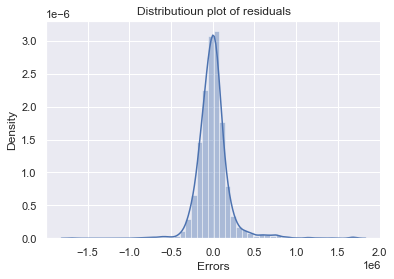

In [163]:
#checking weather error is following a normal distributioun or not
sns.distplot(error)                                 #plotting errors
plt.xlabel("Errors")                                #plotting x-label
plt.ylabel("Density")                               #plotting y-label
plt.title("Distributioun plot of residuals")        #plotting title
plt.show()                                          #showing graph

***observation-***

**the residuals are following a normal distributioun.**


## Decison tree model -

In [164]:

#initating model

model_decison_tree_test = DecisionTreeRegressor(max_depth=val    #setting the optimal value of max depth that we got using cv
                                  ,min_samples_leaf=val1,   #setting the optimal value of min_samples_leaf that we got using cv
                                  min_samples_split=val2)   #setting the optimal value of min_samples_split that we got using cv

#fitting model

model_decison_tree_test = model_decison_tree_test.fit(X_train,y_train)

In [165]:
y_pred = model_decison_tree_test.predict(X_test)

In [166]:
#checking the performance of the model using RMSE

error = y_test - y_pred 

RMSE = np.sqrt(np.mean(error**2))
RMSE

181686.34346210258

In [167]:
#checking the performance of the model using RMSE

MAE = np.mean(abs(error))
MAE

102803.96024979583

In [168]:
#checking for r_square vaue

R_square = model_decison_tree_test.score(X_test,y_test)
R_square  

0.7432354786195552

****Decision tree has the lowest RMSE and MAE and higher R_square Value hence, we would consider Decison tree model to be the best fit for our data.****